# EMBEDDING (word2vec, FastText, Glove, HomeMadeEmbedding)

- bank2Vec
- Word2Vec (by Google)
- Fasttext (by Facebook)
- Glove (by Standford)
- WordRank 

### The Current Best of Universal Word Embeddings and Sentence Embeddings

https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a

http://jalammar.github.io/illustrated-bert/

https://colab.research.google.com/drive/13f6dKakC-0yO6_DxqSqo0Kl41KMHT8A1

- **Word Embedding** --> Encode words and sentences in fixed-length dense vectors to drastically improve the processing of textual data.

- **Universal Embeddings:** Embeddings that are **pre-trained** on a large corpus and can be plugged in a variety of downstream task models (sentimental analysis, classification, translation…) to automatically improve their performance by incorporating some general word/sentence representations learned on the larger dataset ---> **transfer learning**

- **strong/fast baselines:** FastText, Bag-of-Words

- **state-of-the-art models:** ELMo, Skip-Thoughts, Quick-Thoughts, InferSent, MILA/MSR’s General Purpose Sentence Representations & Google’s Universal Sentence Encoder.

Most commonly used models are **word2vec** and **GloVe** which are both unsupervised approaches based on the **distributional hypothesis** (words that occur in the same contexts tend to have similar meanings).

Incorporating the **supervision of semantic or syntactic knowledge** -> the most notable being **FastText** (an extension of word2vec) and **ELMo** (state-of-the-art contextual word vectors).


- **Fasttext** = The main improvement of FastText over the original word2vec vectors is the **inclusion of character n-grams**, which **allows computing word representations for words** that did not appear in the training data **(“out-of-vocabulary” words)**

- **ELMo** = each word is assigned a representation which is a function of the entire corpus sentences to which they belong. The embeddings are computed from the internal states of a two-layers bidirectional Language Model (LM), hence the name “ELMo”: **Embeddings from Language Models**

         - **ELMo’s inputs are characters rather than words**. They can thus take advantage of **sub-word units** to compute meaningful representations even for out-of-vocabulary words (like FastText).

        - **ELMo are concatenations of the activations on several layers of the biLMs**. Different layers of a language model encode different kind of information on a word (e.g. Part-Of-Speech tagging is well predicted by the lower level layers of a biLSTM while word-sense disambiguation is better encoded in higher-levels). **Concatenating all layers allows to freely combine a variety of word representations for better performances on downstream tasks.**

# 0. Create your personal home-made embedding

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()
import os
# load the word2vec algorithm from the gensim library
from gensim.models import word2vec

# function to clean text
def review_to_words(raw_review):
    
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 3. Remove Stopwords. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]  #returns a list 

    # 5. Stem words. Need to define porter stemmer above
    singles = [stemmer.stem(word) for word in meaningful_words]
    
    # 6. Join the words back into one string separated by space, and return the result.
    return( " ".join( singles ))

# build a corpus for the word2vec model
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
data_consumer_complaint = pd.read_excel('data\\consumer_complaint.xlsx')
data_consumer_complaint = data_consumer_complaint['Consumer_complaint_narrative']
# apply it to our text data 
# dataset is named wine_data and the text are in the column "wmn"
processed_wmn = [review_to_words(text) for text in data_consumer_complaint]

corpus = build_corpus(processed_wmn)

model_homemade_embedding = word2vec.Word2Vec(corpus, size=100, window=5, min_count=1000, workers=4)

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [8]:
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

fname = get_tmpfile("model_homemade_embedding_consumer_complaint.kv")
model_homemade_embedding.save(fname)
# model_homemade_embedding = KeyedVectors.load(fname, mmap='r')

from gensim.models import Word2Vec, KeyedVectors   
model_homemade_embedding.wv.save_word2vec_format('model_homemade_embedding_consumer_complaint.bin', binary=True)

# 1. Create an instance to generate any pre-trained embedding 

In [ ]:
import datetime
import numpy as np
import os

import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

# import tensorflow as tf
# from tensorflow.contrib.tensorboard.plugins import projector

print('gensim Version: %s' % (gensim.__version__))

class WordEmbedding: 

    def __init__(self, verbose=0):
        self.verbose = verbose
        self.model = {}
        
    def convert(self, source, ipnut_file_path, output_file_path):
        if source == 'glove':
            input_file = datapath(ipnut_file_path)
            output_file = get_tmpfile(output_file_path)
            glove2word2vec(input_file, output_file)
        elif source == 'word2vec':
            pass
        elif source == 'fasttext':
            pass
        elif source == 'homemade_embedding':
            pass
        else:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
        
    def load(self, source, file_path):
        print(datetime.datetime.now(), 'start: loading', source)
        if source == 'glove':
            self.model[source] = gensim.models.KeyedVectors.load_word2vec_format(file_path)
        elif source == 'word2vec':
            self.model[source] = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)
        elif source == 'fasttext':
            self.model[source] = gensim.models.wrappers.FastText.load_fasttext_format(file_path)
        elif source == 'homemade_embedding':
            self.model[source] = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)
        else:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
            
        print(datetime.datetime.now(), 'end: loading', source)
            
        return self
    
    def get_model(self, source):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
            
        return self.model[source]
    
    def get_words(self, source, size=None):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
        
        if source in ['glove', 'word2vec','homemade_embedding']:
            if size is None:
                return [w for w in self.get_model(source=source).vocab]
            elif size is None:
                return [w for w in self.get_model(source=source).vocab]
            else:
                results = []
                for i, word in enumerate(self.get_model(source=source).vocab):
                    if i >= size:
                        break
                        
                    results.append(word)
                return results
            
        elif source in ['fasttext']:
            if size is None:
                return [w for w in self.get_model(source=source).wv.vocab]
            else:
                results = []
                for i, word in enumerate(self.get_model(source=source).wv.vocab):
                    if i >= size:
                        break
                        
                    results.append(word)
                return results
        
        return Exception('Unexpected flow')
    
    def get_dimension(self, source):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
        
        if source in ['glove', 'word2vec','homemade_embedding']:
            return self.get_model(source=source).vectors[0].shape[0]
            
        elif source in ['fasttext']:
            word = self.get_words(source=source, size=1)[0]
            return self.get_model(source=source).wv[word].shape[0]
        
        return Exception('Unexpected flow')
    
    def get_vectors(self, source, words=None):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
        
        if source in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            if words is None:
                words = self.get_words(source=source)
            
            embedding = np.empty((len(words), self.get_dimension(source=source)), dtype=np.float32)            
            for i, word in enumerate(words):
                embedding[i] = self.get_vector(source=source, word=word)
                
            return embedding
        
        return Exception('Unexpected flow')
    
    def get_vector(self, source, word, oov=None):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
            
        if source not in self.model:
            raise ValueError('Did not load %s model yet' % source)
        
        try:
            return self.model[source][word]
        except KeyError as e:
            raise
            
    def get_synonym(self, source, word, oov=None):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
            
        if source not in self.model:
            raise ValueError('Did not load %s model yet' % source)
        
        try:
            return self.model[source].most_similar(positive=word, topn=5)
        except KeyError as e:
            raise
    
    def which_distance_between_two_words(self, source, word1, word2, oov=None):
        if source not in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
            raise ValueError('Possible value of source are glove, word2vec, fasttext, or HomeMadeEmbedding')
            
        if source not in self.model:
            raise ValueError('Did not load %s model yet' % source)
        
        try:
            return self.model[source].similarity(word1, word2)
        except KeyError as e:
            raise

In [ ]:
# We may need to convert text file (downloaed from GloVe website) to vector format
# word_embedding.convert(source='glove', ipnut_file_path=downloaded_glove_file_path, output_file_path=glove_file_path)

In [ ]:
downloaded_glove_file_path = 'C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\glove.6B.50d.txt'
glove_file_path = 'C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\glove.840B.300d.vec'

word2vec_file_path = 'C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\GoogleNews-vectors-negative300.bin'
fasttext_file_path = 'C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\wiki.en.bin'

homemade_embedding_file_path = 'C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\model_homemade_embedding.bin'

word_embedding = WordEmbedding()

In [ ]:
word_embedding.load(source='word2vec', file_path=word2vec_file_path)
word_embedding.load(source='glove', file_path=glove_file_path)
word_embedding.load(source='fasttext', file_path=fasttext_file_path)
word_embedding.load(source='homemade_embedding', file_path=homemade_embedding_file_path)

### 1. Get vectors

In [ ]:
for source in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
    print('Source: %s' % (source))
    print(word_embedding.get_vector(source=source, word='fail'))
    print(len(word_embedding.get_vector(source=source, word='fail')))

### 2. Get Most Similar Words

In [ ]:
for source in ['glove', 'word2vec', 'fasttext', 'homemade_embedding']:
    print('Source: %s' % (source))
    print(word_embedding.get_synonym(source=source, word='fail'))

### 3. Get Distance

In [ ]:
w1 = 'king'
w2 = 'queen'

for source in ['glove', 'word2vec', 'fasttext']:
    print('Source: %s' % (source))
    print(word_embedding.which_distance_between_two_words(source=source,word1=w1, word2=w2))

# VISUALISATION

## 1. Visualizaing Similar Words from Google News

https://github.com/sismetanin/word2vec-tsne/blob/master/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb

In [ ]:
import gensim

model_gn = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

## 2. Visualizaing Word2Vec Vectors from Leo Tolstoy Books

In [10]:
homemade_embedding_file_path = 'C:\\Users\\adsieg\\Desktop\\Multi-Text-Classification\\embedding\\model_homemade_embedding.bin'


model_consumer_complaint = KeyedVectors.load_word2vec_format(homemade_embedding_file_path, binary=True)  # C bin format

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

words_ak = []
embeddings_ak = []
for word in list(model_consumer_complaint.wv.vocab):
    embeddings_ak.append(model_consumer_complaint.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


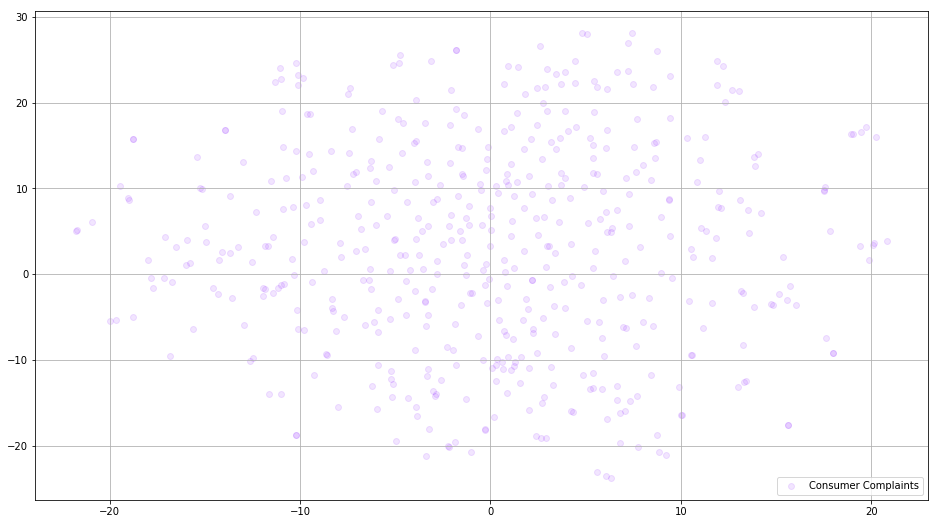

In [15]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Consumer Complaints', embeddings_ak_2d, a=0.1)

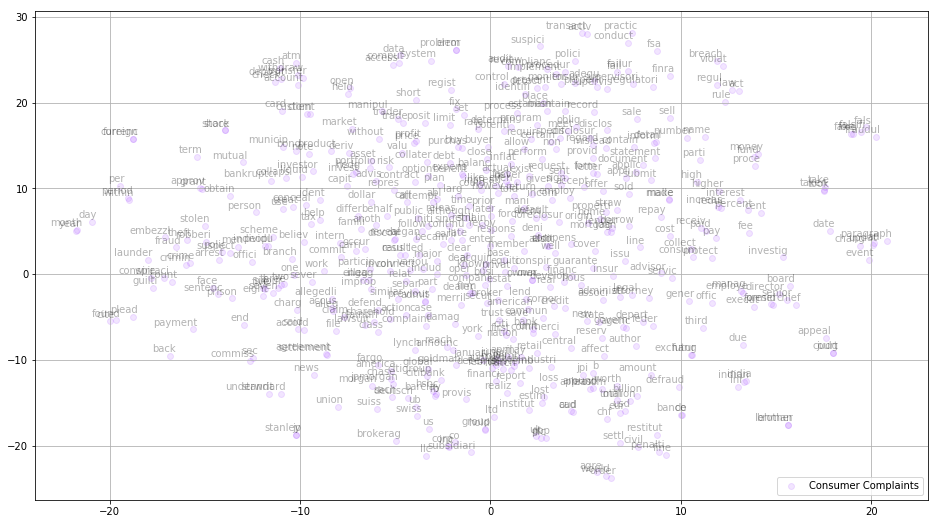

In [16]:
tsne_plot_2d('Consumer Complaints', embeddings_ak_2d, words_ak, 0.1)

In [17]:
words_wp = []
embeddings_wp = []
for word in list(model_consumer_complaint.wv.vocab):
    embeddings_wp.append(model_consumer_complaint.wv[word])
    words_wp.append(word)
    
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


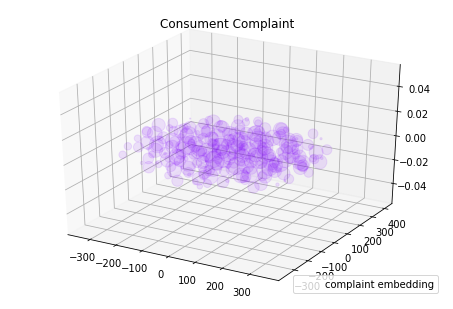

In [19]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Consument Complaint', 'complaint embedding', embeddings_wp_3d, a=0.1)

In [20]:
[(item[0],round(item[1],2)) for item in model_consumer_complaint.most_similar('report')]

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('estim', 0.53),
 ('subsidiari', 0.5),
 ('financi', 0.48),
 ('institut', 0.48),
 ('inc', 0.41),
 ('us', 0.38),
 ('plc', 0.37),
 ('corp', 0.36),
 ('co', 0.34),
 ('jpi', 0.33)]

In [21]:
[(item[0],round(item[1],2)) for item in model_consumer_complaint.most_similar('complaint')]

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lawsuit', 0.44),
 ('case', 0.36),
 ('bankruptci', 0.32),
 ('late', 0.3),
 ('sec', 0.3),
 ('plaintiff', 0.29),
 ('initi', 0.28),
 ('fsa', 0.27),
 ('began', 0.27),
 ('investig', 0.26)]

In [26]:
keys = ['lawsuit','complaint','fsa', 'late', 'cost', 'plaintiff', 'loan']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_consumer_complaint.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_consumer_complaint[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\Users\adsieg\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [27]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

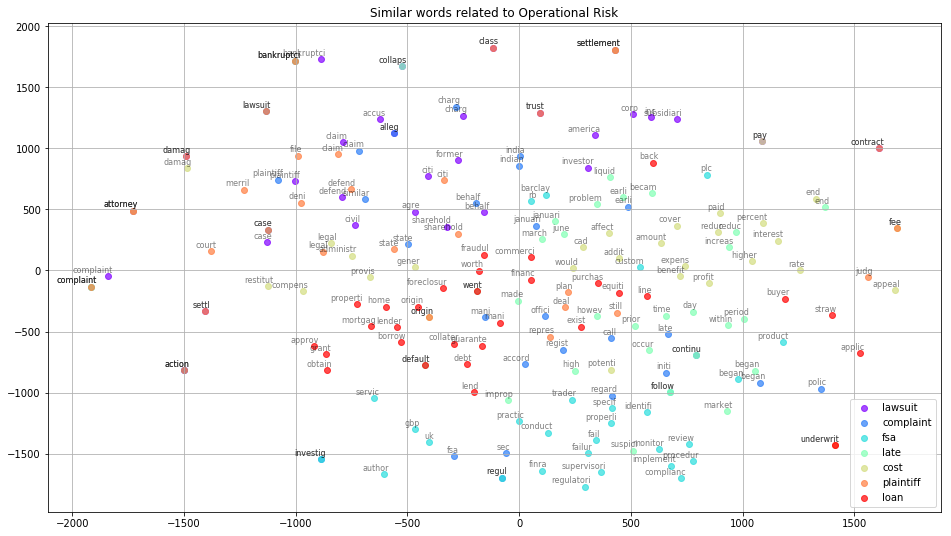

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words related to Consumer Complaint', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# SOURCES

https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector

https://github.com/javaidnabi31/Word-Embeddding-Sentiment-Classification

https://towardsdatascience.com/elmo-contextual-language-embedding-335de2268604

https://github.com/nlptown/nlp-notebooks

http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html

https://yidatao.github.io/2017-08-03/word2vec-aha/

https://github.com/makcedward/nlp/blob/master/sample/nlp-word_embedding.ipynb

https://towardsdatascience.com/word2vec-made-easy-139a31a4b8ae

https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281

https://rare-technologies.com/wordrank-embedding-crowned-is-most-similar-to-king-not-word2vecs-canute/

https://github.com/JacopoMangiavacchi/SwiftNLC/tree/master/ModelNotebooks

http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/text_sentiment_wordvec.html#les-donnees

https://medium.com/@JMangia/coreml-with-glove-word-embedding-and-recursive-neural-network-part-2-ab238ca90970

https://towardsdatascience.com/word2vec-made-easy-139a31a4b8ae
